In [1]:
import TurbPy as tb
from TurbPy.imports import *

In [2]:
# deck = 'KH_Lv1di/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'
# deck = 'KH_test/'
# deck = 'KH_beta0.1/'
# deck = 'KH_subash/'
# deck = 'KH_new/'
# deck = 'KH_800ppc/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck
data = dirs + 'data/'
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)/(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

twce_out = np.linspace(0, times[-1] * info['dt*wce'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))

In [3]:
jz = tb.load_var('jz', dirs, 240000, species = 'electron')

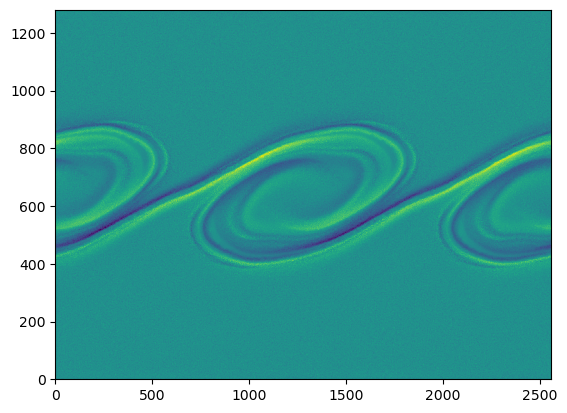

In [4]:
plt.pcolormesh(jz)

In [5]:


t = 1000
dse = tb.load_hydro_fil(dirs, times[t], species = 'electron')
dsi = tb.load_hydro_fil(dirs, times[t], species = 'ion')

In [7]:
uxe = (dse['jx']/dse['rho'])
uye = (dse['jy']/dse['rho'])
uze = (dse['jz']/dse['rho'])
uxi = (dsi['jx']/dsi['rho'])[100:1180, :]
uyi = (dsi['jy']/dsi['rho'])[100:1180, :]
uzi = (dsi['jz']/dsi['rho'])[100:1180, :]
ome = tb.pcurl(uxe,
                uye, 
                uze, 
                dx = info['dx/de'], 
                dy = info['dy/de'], 
                dz = info['dz/de'])
# omi = tb.pcurl(uxi,
#               uxe, 
#               uze, 
#               dx = info['dx/de'], 
#               dy = info['dy/de'], 
#               dz = info['dz/de'])

In [8]:
# print(ome[0].shh)

In [10]:
ome_abs = np.sqrt(ome[0]**2 + ome[1]**2 + ome[2]**2)
# omi_abs = np.sqrt(omi[0]**2 + omi[1]**2 + omi[2]**2)

138.10680000000002


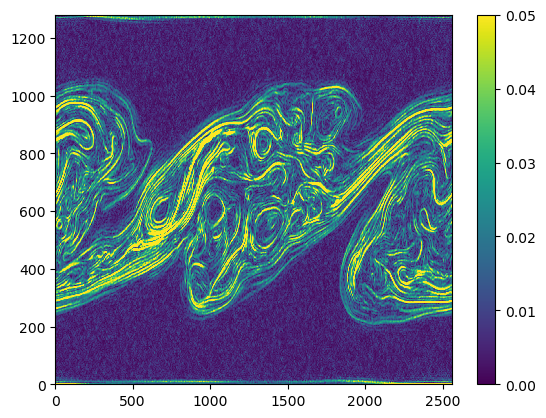

In [11]:
print(twci[t])
plt.pcolormesh(ome_abs, vmin = 0, vmax = 5e-2)
plt.colorbar()

In [29]:
omi_abs.shape

(1080, 2560)

In [30]:
print(len(omi_abs[:,1250]))

1080


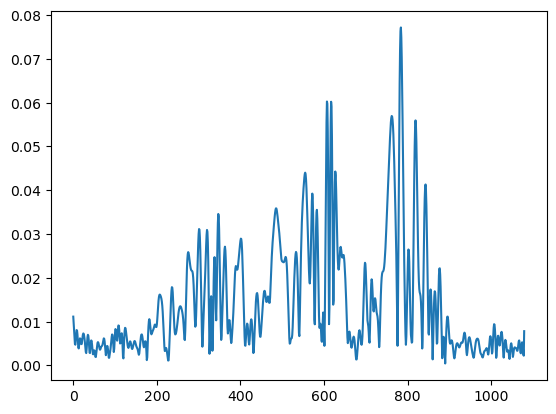

In [31]:
plt.plot(omi_abs[:,1250])
# plt.ylim(0, 0.01)
# plt.xlim(0.01,100)
# plt.axvline(60)
# plt.axvline(1220)

138.10680000000002


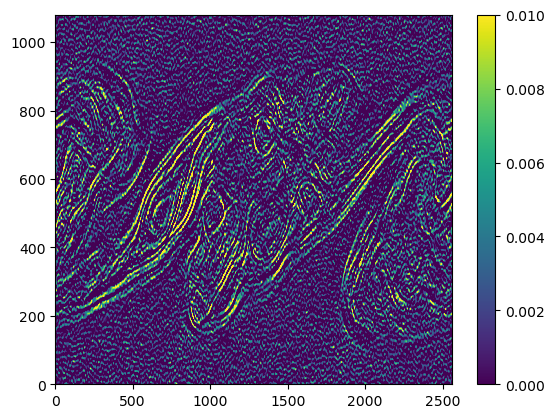

In [32]:
print(twci[t])
# omi_abs = omi[2]
plt.pcolormesh(omi[2], vmin = 0, vmax = 1e-2)
plt.colorbar()

138.10680000000002


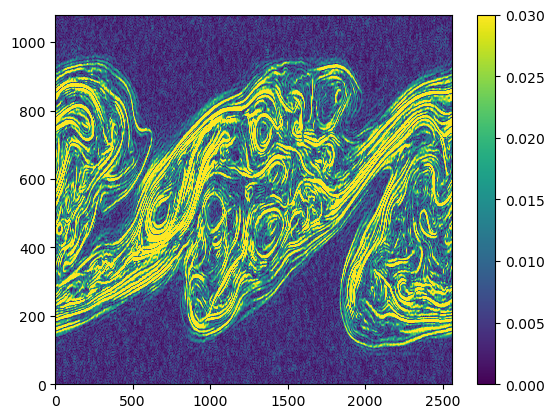

In [33]:
print(twci[t])
# omi_abs = omi[2]
plt.pcolormesh(omi_abs, vmin = 0, vmax = 3e-2)
plt.colorbar()

In [34]:
np.average(omi[0]**2 + omi[1]**2 + omi[2]**2)

0.00041781639784415367

In [35]:
print(np.average(omi_abs**2))
print(np.average(omi_abs[60:1220]**2))

0.00041781639784415367
0.0004410343750988292


In [37]:
np.average(np.average(omi[0]**2 + omi[1]**2 + omi[2]**2))

0.00041781639784415367

138.10680000000002


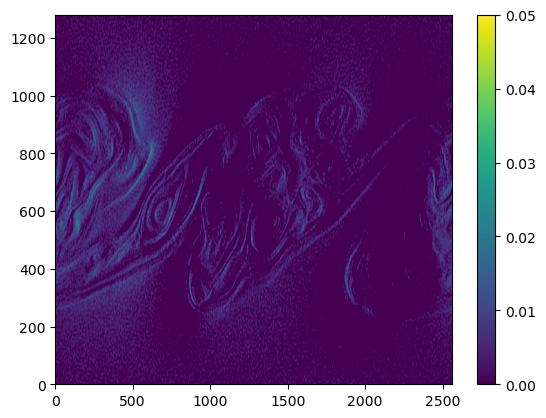

In [38]:
print(twci[t])
plt.pcolormesh(dse['jx'], vmin = 0, vmax = 5e-2)
plt.colorbar()

In [39]:
(dsi['jy']/dsi['rho'])[0,1250]

-0.002873978885497636

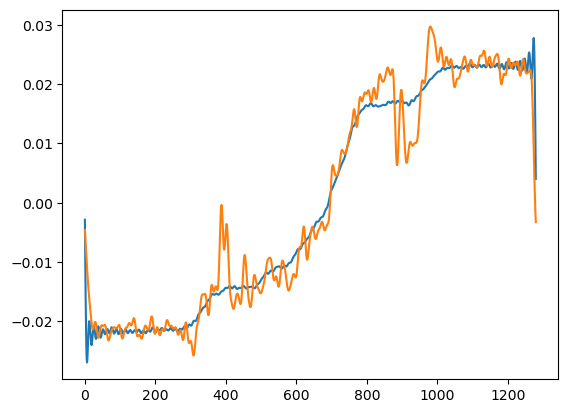

In [40]:
plt.plot((dsi['jy']/dsi['rho'])[:,1250])
plt.plot((dse['jy']/dse['rho'])[:,1250])
# plt.ylim(0, 0.01)
# plt.xlim(0,100)
# plt.axvline(60)
# plt.axvline(1220)

138.10680000000002


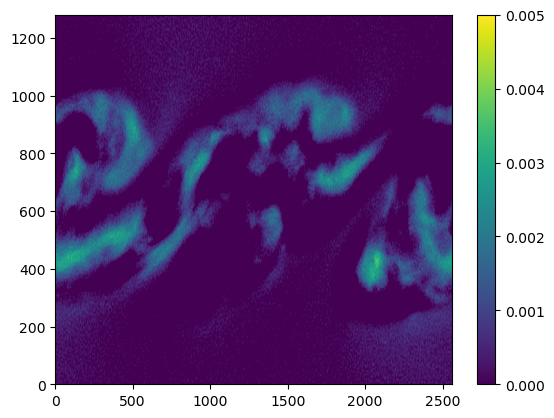

In [41]:
print(twci[t])
plt.pcolormesh(dsi['jz']/dsi['rho'], vmin = 0, vmax = 5e-3)
plt.colorbar()

In [42]:
omi = tb.pcurl((dsi['jx']/dsi['rho']),
              (dsi['jy']/dsi['rho']),
              (dsi['jz']/dsi['rho']),
              dx = info['dx/de'], 
              dy = info['dy/de'], 
              dz = info['dz/de'])

138.10680000000002


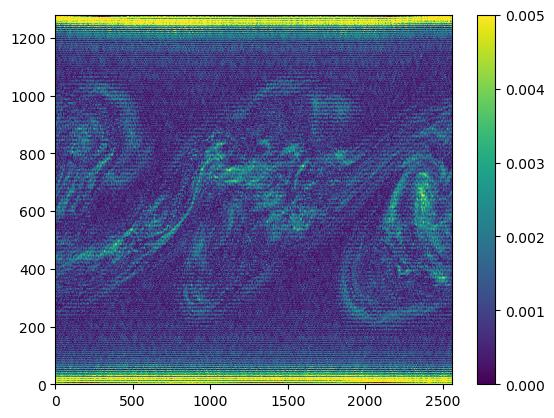

In [44]:
print(twci[t])
# omi_abs = omi[2]
omi_abs = np.sqrt(omi[0]**2 + omi[1]**2 + omi[2]**2)
plt.pcolormesh(omi_abs, vmin = 0, vmax = 5e-3)
plt.colorbar()